In [1]:
import requests
from bs4 import BeautifulSoup as BS
from IPython.core.display import HTML
import pandas as pd
pd.set_option('display.max_rows', None)
import re
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
URL_16="https://web.archive.org/web/20160524083404/https://www.numbeo.com/cost-of-living/country_result.jsp?country=United+States"
# wayback machine referencing data from May of 2016
response=requests.get(URL_16)

In [3]:
response.status_code

200

In [4]:
response.text

'<!DOCTYPE html>\n<html>\n<head><script src="//archive.org/includes/analytics.js?v=cf34f82" type="text/javascript"></script>\n<script type="text/javascript">window.addEventListener(\'DOMContentLoaded\',function(){var v=archive_analytics.values;v.service=\'wb\';v.server_name=\'wwwb-app213.us.archive.org\';v.server_ms=402;archive_analytics.send_pageview({});});</script>\n<script type="text/javascript" src="/_static/js/bundle-playback.js?v=36gO9Ebf" charset="utf-8"></script>\n<script type="text/javascript" src="/_static/js/wombat.js?v=UHAOicsW" charset="utf-8"></script>\n<script type="text/javascript">\n  __wm.init("https://web.archive.org/web");\n  __wm.wombat("http://www.numbeo.com:80/cost-of-living/country_result.jsp?country=United+States","20160524083404","https://web.archive.org/","web","/_static/",\n\t      "1464078844");\n</script>\n<link rel="stylesheet" type="text/css" href="/_static/css/banner-styles.css?v=fantwOh2" />\n<link rel="stylesheet" type="text/css" href="/_static/css/i

In [5]:
tomato_soup=BS(response.text)
print(tomato_soup.prettify())

<!DOCTYPE html>
<html>
 <head>
  <script src="//archive.org/includes/analytics.js?v=cf34f82" type="text/javascript">
  </script>
  <script type="text/javascript">
   window.addEventListener('DOMContentLoaded',function(){var v=archive_analytics.values;v.service='wb';v.server_name='wwwb-app213.us.archive.org';v.server_ms=402;archive_analytics.send_pageview({});});
  </script>
  <script charset="utf-8" src="/_static/js/bundle-playback.js?v=36gO9Ebf" type="text/javascript">
  </script>
  <script charset="utf-8" src="/_static/js/wombat.js?v=UHAOicsW" type="text/javascript">
  </script>
  <script type="text/javascript">
   __wm.init("https://web.archive.org/web");
  __wm.wombat("http://www.numbeo.com:80/cost-of-living/country_result.jsp?country=United+States","20160524083404","https://web.archive.org/","web","/_static/",
	      "1464078844");
  </script>
  <link href="/_static/css/banner-styles.css?v=fantwOh2" rel="stylesheet" type="text/css"/>
  <link href="/_static/css/iconochive.css?v=qtv

In [6]:
item = tomato_soup.findAll('td')[5]
item
#To quote Amanda Partlow, "why re-invent the wheel when you have something that already works"

<td>Meal, Inexpensive Restaurant </td>

In [7]:
items = tomato_soup.find(class_= 'data_wide_table').findAll('td')
items

[<td>Meal, Inexpensive Restaurant </td>,
 <td class="priceValue" style="text-align: right"> 12.00 $</td>,
 <td class="priceBarTd">
 <span class="barTextLeft">
 10.00</span><span class="barLeft" style="width: 12px;"></span><span class="barMid"><span class="barMid-nocss">-</span></span><span class="barRight" style="width: 36px;"></span><span class="barTextRight">18.00</span></td>,
 <td class="tr_highlighted">Meal for 2 People, Mid-range Restaurant, Three-course </td>,
 <td class="priceValue tr_highlighted" style="text-align: right"> 50.00 $</td>,
 <td class="priceBarTd tr_highlighted">
 <span class="barTextLeft">
 35.00</span><span class="barLeft" style="width: 21px;"></span><span class="barMid"><span class="barMid-nocss">-</span></span><span class="barRight" style="width: 30px;"></span><span class="barTextRight">70.00</span></td>,
 <td>McMeal at McDonalds (or Equivalent Combo Meal) </td>,
 <td class="priceValue" style="text-align: right"> 7.00 $</td>,
 <td class="priceBarTd">
 <span cla

In [8]:
#items.find(class_= 'tr_highlighted')
table_16=pd.read_html("https://web.archive.org/web/20160524083404/https://www.numbeo.com/cost-of-living/country_result.jsp?country=United+States")
table_16= table_16[2]
table_16.head()

,Restaurants,[ Edit ] Avg.,Range
0,"Meal, Inexpensive Restaurant",12.00 $,10.00-18.00
1,"Meal for 2 People, Mid-range Restaurant, Three...",50.00 $,35.00-70.00
2,McMeal at McDonalds (or Equivalent Combo Meal),7.00 $,5.99-8.00
3,Domestic Beer (1 pint draught),4.00 $,3.00-5.00
4,Imported Beer (11.2 oz small bottle),5.00 $,4.00-7.00


### We got the first of the cost of living datasets from read_html, let's make it a dataframe

In [9]:
cost16=pd.DataFrame(table_16)
cost16

,Restaurants,[ Edit ] Avg.,Range
0,"Meal, Inexpensive Restaurant",12.00 $,10.00-18.00
1,"Meal for 2 People, Mid-range Restaurant, Three...",50.00 $,35.00-70.00
2,McMeal at McDonalds (or Equivalent Combo Meal),7.00 $,5.99-8.00
3,Domestic Beer (1 pint draught),4.00 $,3.00-5.00
4,Imported Beer (11.2 oz small bottle),5.00 $,4.00-7.00
5,Cappuccino (regular),3.82 $,3.00-5.00
6,Coke/Pepsi (11.2 oz small bottle),1.70 $,1.25-2.00
7,Water (11.2 oz small bottle),1.38 $,1.00-2.00
8,Markets,[ Edit ] Avg.,NaN
9,"Milk (regular), (1 gallon)",3.50 $,2.79-4.25


## Set up Cost of Living datasets

###### We have the 2016 dataframe, set up the rest. 

##### The wayback machine is not consistent on WHEN it captures, but at least once a month. 
##### could not make a loop because of inconsistent days recorded for scraping 

In [10]:
#the 3rd table is general trends in averages across the US
table_17=pd.read_html("https://web.archive.org/web/201704083404/https://www.numbeo.com/cost-of-living/country_result.jsp?country=United+States")
table_17= table_17[3]
table_18=pd.read_html("https://web.archive.org/web/20180429062837/https://www.numbeo.com/cost-of-living/country_result.jsp?country=United+States")
table_18= table_18[3]
table_19=pd.read_html("https://web.archive.org/web/20190403235143/https://www.numbeo.com/cost-of-living/country_result.jsp?country=United+States")
table_19= table_19[3]
# I changed 2020 to reflect data from 2015 so that it matches with the crime data. I will leave the name as 20 for simplicity
table_20=pd.read_html("https://web.archive.org/web/20150527153415/http://www.numbeo.com:80/cost-of-living/country_result.jsp?country=United+States")
table_20= table_20[3]

##### Let's check to make sure all of that went through correctly and there are no problems.

In [11]:
table_17.head()
#looks good

,Restaurants,[ Edit ] Avg.,Range
0,"Meal, Inexpensive Restaurant",13.00 $,10.00-20.00
1,"Meal for 2 People, Mid-range Restaurant, Three...",50.00 $,35.00-70.00
2,McMeal at McDonalds (or Equivalent Combo Meal),7.00 $,6.00-8.00
3,Domestic Beer (0.5 liter draught),4.00 $,3.00-5.00
4,Imported Beer (0.33 liter bottle),5.00 $,4.00-7.00


In [12]:
table_17.tail()

,Restaurants,[ Edit ] Avg.,Range
59,Price per Square Meter to Buy Apartment in Cit...,"2,190.01 $","1,076.39-5,252.78"
60,Price per Square Meter to Buy Apartment Outsid...,"1,545.22 $","807.29-3,261.46"
61,Salaries And Financing,[ Edit ] Avg.,NaN
62,Average Monthly Net Salary (After Tax),"2,934.97 $",NaN
63,"Mortgage Interest Rate in Percentages (%), Yearly",3.93,3.25-4.99


In [13]:
table_18.head()

,Restaurants,[ Edit ],Range
0,"Meal, Inexpensive Restaurant",13.00 $,10.00-20.00
1,"Meal for 2 People, Mid-range Restaurant, Three...",50.00 $,35.00-70.00
2,McMeal at McDonalds (or Equivalent Combo Meal),7.00 $,6.00-8.00
3,Domestic Beer (1 pint draught),4.00 $,3.00-6.00
4,Imported Beer (11.2 oz small bottle),5.00 $,4.00-7.00


In [14]:
table_19.head()
# It WORKS! Finally starting to see some difference in prices too.

,Restaurants,[ Edit ],Range
0,"Meal, Inexpensive Restaurant",14.00 $,10.00-20.00
1,"Meal for 2 People, Mid-range Restaurant, Three...",50.00 $,35.00-70.00
2,McMeal at McDonalds (or Equivalent Combo Meal),7.00 $,6.00-8.50
3,Domestic Beer (0.5 liter draught),4.00 $,3.00-6.00
4,Imported Beer (0.33 liter bottle),5.75 $,4.00-7.00


In [15]:
table_20.head()

,Index,Unnamed: 1
0,Consumer Price Index (Excl.Rent):,72.55
1,Rent Index:,31.57
2,Groceries Index:,75.98
3,Restaurants Index:,67.96
4,Consumer Price Plus Rent Index:,51.71


#### 2021 was not pulling correctly, so I singled that one out from the above column

In [16]:
table_21=pd.read_html("https://web.archive.org/web/20210605054203/https://www.numbeo.com/cost-of-living/country_result.jsp?country=United+States")
table_21= table_21[2]
table_21.head()
#There was a slightly different index. Once located it produced the same table

,Restaurants,Edit,Range
0,"Meal, Inexpensive Restaurant",15.00 $,9.00-27.00
1,"Meal for 2 People, Mid-range Restaurant, Three...",60.00 $,40.00-100.00
2,McMeal at McDonalds (or Equivalent Combo Meal),8.00 $,7.00-10.00
3,Domestic Beer (1 pint draught),5.00 $,3.00-8.00
4,Imported Beer (12 oz small bottle),6.00 $,4.00-9.00


In [17]:
cost17=pd.DataFrame(table_17)
cost18=pd.DataFrame(table_18)
cost19=pd.DataFrame(table_19)
cost20=pd.DataFrame(table_20)
cost21=pd.DataFrame(table_21)

In [18]:
# Let's likewise use tabel to read in specifics for dense cities and use those as a representative of each state. 
tabel15=pd.read_html("https://web.archive.org/web/20150527153415/http://www.numbeo.com:80/cost-of-living/country_result.jsp?country=United+States")
tabel15= tabel15[7]
tabel15

,City,Consumer Price Index,Rent Index,Consumer Price Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,"New York, NY",100.00,100.00,100.00,100.00,100.00,100.00
1,"Honolulu, HI",98.48,53.49,75.60,112.66,84.04,96.04
2,"Brooklyn, NY",96.76,72.76,84.55,102.08,94.98,128.81
3,"Washington, DC",95.91,65.39,80.39,96.86,96.78,144.63
4,"Anchorage, AK",93.89,37.27,65.09,100.92,86.67,169.98
5,"San Francisco, CA",91.31,98.71,95.07,101.50,99.44,112.31
6,"Seattle, WA",89.25,57.50,73.11,96.92,82.28,136.45
7,"Hartford, CT",88.08,33.96,60.56,101.85,84.00,174.35
8,"Stamford, CT",87.38,57.03,71.95,94.83,90.03,156.87
9,"Philadelphia, PA",86.40,45.35,65.52,97.53,80.65,108.00


#### Best indexes to use seem to be: 
NY-0,
HI-1,
AK-4,
CA-5,
WA-6,
CT-7,
ID-68,
UT-67,
GA-50,
TX-38,
NC-36,
WI-33,
CO-32,

In [19]:
tabel16=pd.read_html("https://web.archive.org/web/20160524083404/https://www.numbeo.com/cost-of-living/country_result.jsp?country=United+States")
tabel16= tabel16[5]
tabel16.head()


,Rank,City,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,NaN,"New York, NY",100.00,100.00,100.00,100.00,100.00,100.00
1,NaN,"Honolulu, HI",99.00,65.44,83.09,110.54,83.76,91.83
2,NaN,"San Francisco, CA",98.81,123.80,110.66,110.55,90.70,103.45
3,NaN,"Washington, DC",93.84,75.86,85.32,88.24,87.48,119.37
4,NaN,"Chicago, IL",85.29,55.30,71.07,85.13,85.25,128.57


In [20]:
tabel17=pd.read_html("https://web.archive.org/web/201704083404/https://www.numbeo.com/cost-of-living/country_result.jsp?country=United+States")
tabel17= tabel17[6]
#tabel17 works
tabel18=pd.read_html("https://web.archive.org/web/20180429062837/https://www.numbeo.com/cost-of-living/country_result.jsp?country=United+States")
tabel18= tabel18[6]
#tabel18 functioning like a dream
tabel19=pd.read_html("https://web.archive.org/web/20190403235143/https://www.numbeo.com/cost-of-living/country_result.jsp?country=United+States")
tabel19= tabel19[6]
#good. All have been checked by the function below slightly modified for each year. 

In [21]:
tabel19.head()

,Rank,City,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,NaN,"New York, NY",100.00,100.00,100.00,100.00,100.00,100.00
1,NaN,"Honolulu, HI",95.10,61.09,78.58,104.82,82.13,93.09
2,NaN,"Washington, DC",93.06,71.55,82.61,99.27,87.33,135.85
3,NaN,"San Francisco, CA",90.81,107.54,98.94,91.21,88.13,137.56
4,NaN,"Brooklyn, NY",90.61,79.59,85.25,87.66,95.26,80.55


### That pulls in our Cost of living data.
###### The crime data was pulled in as CSV format from https://ucr.fbi.gov/crime-in-the-u.s/{year}

In [22]:
cr16=pd.read_csv("../data/crime2016.csv", nrows=202)
header_row = cr16.iloc[2]
cr16 = pd.DataFrame(cr16.values[3:], columns=header_row)
cr16

2,Area,Year,Population2,Violent crime3,NaN,Murder and \nnonnegligent \nmanslaughter,NaN,Rape\n(revised definition)4,NaN,Rape\n(legacy definition)5,...,Aggravated assault,NaN,Property crime,NaN,Burglary,NaN,Larceny-theft,NaN,Motor vehicle theft,NaN
0,NaN,NaN,NaN,,"Rate per \n100,000",,"Rate per \n100,000",,"Rate per \n100,000",,...,,"Rate per \n100,000",,"Rate per \n100,000",,"Rate per \n100,000",,"Rate per \n100,000",,"Rate per \n100,000"
1,"United States Total6, 7, 8, 9",2015,"320,896,618","1,234,183",384.6,"15,883",4.9,"126,134",39.3,"91,261",...,"764,057",238.1,"8,024,115","2,500.50","1,587,564",494.7,"5,723,488","1,783.60","713,063",222.2
2,NaN,2016,"323,127,513","1,283,058",397.1,"17,250",5.3,"130,603",40.4,"95,730",...,"803,007",248.5,"7,919,035","2,450.70","1,515,096",468.9,"5,638,455","1,745.00","765,484",236.9
3,NaN,Percent change,NaN,4,3.2,8.6,7.9,3.5,2.8,4.9,...,5.1,4.4,-1.3,-2,-4.6,-5.2,-1.5,-2.2,7.4,6.6
4,Northeast6,2015,"56,184,737","180,474",321.2,"1,967",3.5,"16,415",29.2,"11,912",...,"105,890",188.5,"951,940","1,694.30","157,910",281.1,"737,087","1,311.90","56,943",101.3
5,NaN,2016,"56,209,510","178,244",317.1,"1,955",3.5,"16,651",29.6,"12,219",...,"106,605",189.7,"909,897","1,618.80","142,720",253.9,"709,721","1,262.60","57,456",102.2
6,NaN,Percent change,NaN,-1.2,-1.3,-0.6,-0.7,1.4,1.4,2.6,...,0.7,0.6,-4.4,-4.5,-9.6,-9.7,-3.7,-3.8,0.9,0.9
7,New England6,2015,"14,710,229","42,121",286.3,326,2.2,"4,602",31.3,"3,374",...,"27,564",187.4,"257,073","1,747.60","46,260",314.5,"193,051","1,312.40","17,762",120.7
8,NaN,2016,"14,735,525","41,598",282.3,292,2,"4,505",30.6,"3,328",...,"27,394",185.9,"243,769","1,654.30","42,095",285.7,"182,985","1,241.80","18,689",126.8
9,NaN,Percent change,,-1.2,-1.4,-10.4,-10.6,-2.1,-2.3,-1.4,...,-0.6,-0.8,-5.2,-5.3,-9,-9.2,-5.2,-5.4,5.2,5


### Check the tail to make sure that we have exactly what we want. 

#### If we pulled in 2016 then we can pull in the others in the same way. 

In [23]:
cr16.tail()

2,Area,Year,Population2,Violent crime3,NaN,Murder and \nnonnegligent \nmanslaughter,NaN,Rape\n(revised definition)4,NaN,Rape\n(legacy definition)5,...,Aggravated assault,NaN,Property crime,NaN,Burglary,NaN,Larceny-theft,NaN,Motor vehicle theft,NaN
194,NaN,2016,"7,288,000","22,023",302.2,195,2.7,"3,077",42.2,"2,259",...,"13,100",179.7,"254,653","3,494.10","49,180",674.8,"173,187","2,376.30","32,286",443
195,NaN,Percent change,NaN,7.4,5.5,-10.6,-12.1,10.8,8.8,12.6,...,8.6,6.7,2.1,0.3,-3.8,-5.5,1,-0.7,19.7,17.6
196,Puerto Rico9,2015,"3,473,181","7,629",219.7,584,16.8,165,4.8,123,...,"2,810",80.9,"37,717","1,085.90","9,150",263.4,"24,493",705.2,"4,074",117.3
197,NaN,2016,"3,411,307","7,643",224,679,19.9,169,5,128,...,"3,594",105.4,"35,201","1,031.90","8,251",241.9,"23,163",679,"3,787",111
198,NaN,Percent change,,0.2,2,16.3,18.4,2.4,4.3,4.1,...,27.9,30.2,-6.7,-5,-9.8,-8.2,-5.4,-3.7,-7,-5.4


In [24]:
cr17=pd.read_excel("../data/crime2017.xlsx", nrows=202)
header_row = cr17.iloc[2]
cr17 = pd.DataFrame(cr17.values[3:], columns=header_row)
cr17.head()

2,Area,Year,Population2,Violent crime3,NaN,Murder and \nnonnegligent \nmanslaughter,NaN,Rape\n(revised definition)4,NaN,Robbery,...,NaN,Burglary,NaN,Larceny-theft,NaN,Motor vehicle theft,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,,"Rate per \n100,000",NaN,"Rate per \n100,000",NaN,"Rate per \n100,000",NaN,...,"Rate per \n100,000",NaN,"Rate per \n100,000",NaN,"Rate per \n100,000",NaN,"Rate per \n100,000",NaN,NaN,
1,"United States Total5, 6",2016,323405935,1285606,397.5,17413,5.4,132414,40.9,332797,...,2451.6,1516405,468.9,5644835,1745.4,767290,237.3,NaN,,NaN
2,NaN,2017,325719178,1283220,394,17284,5.3,135755,41.7,319356,...,2362.2,1401840,430.4,5519107,1694.4,773139,237.4,NaN,NaN,NaN
3,NaN,Percent change,NaN,-0.2,-0.9,-0.7,-1.4,2.5,1.8,-4,...,-3.6,-7.6,-8.2,-2.2,-2.9,0.8,*,NaN,NaN,NaN
4,Northeast,2016,56359360,178406,316.6,1977,3.5,16763,29.7,52958,...,1610.7,142092,252.1,708772,1257.6,56917,101,,NaN,NaN


In [25]:
cr18=pd.read_csv("../data/crime2018.csv", nrows=202)
header_row = cr18.iloc[2]
cr18 = pd.DataFrame(cr18.values[3:], columns=header_row)
cr18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 24 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Area                                    66 non-null     object
 1   Year                                    198 non-null    object
 2   Population2                             142 non-null    object
 3   Violent crime3                          198 non-null    object
 4   nan                                     199 non-null    object
 5   Murder and 
nonnegligent 
manslaughter  198 non-null    object
 6   nan                                     199 non-null    object
 7   Rape
(revised definition)4              198 non-null    object
 8   nan                                     199 non-null    object
 9   Robbery                                 198 non-null    object
 10  nan                                     199 non-null    object
 11  Aggrav

In [26]:
cr19=pd.read_csv("../data/crime2019.csv", nrows=202, encoding = "ISO-8859-1")
header_row = cr19.iloc[2]
cr19 = pd.DataFrame(cr19.values[3:], columns=header_row)
cr19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 24 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Area                                    66 non-null     object
 1   Year                                    198 non-null    object
 2   Population2                             142 non-null    object
 3   Violent crime3                          199 non-null    object
 4   nan                                     199 non-null    object
 5   Murder and 
nonnegligent 
manslaughter  198 non-null    object
 6   nan                                     199 non-null    object
 7   Rape
(revised definition)4              198 non-null    object
 8   nan                                     199 non-null    object
 9   Robbery                                 198 non-null    object
 10  nan                                     199 non-null    object
 11  Aggrav

In [27]:
cr15=pd.read_csv("../data/crime2015.csv", nrows=202)
header_row = cr15.iloc[2]
cr15 = pd.DataFrame(cr15.values[3:], columns=header_row)
cr15.head()

2,Area,Year,Population2,Violent crime3,NaN,Murder and \nnonnegligent \nmanslaughter,NaN,Rape\n(revised definition)4,NaN,Rape\n(legacy definition)5,...,NaN,Burglary,NaN,Larceny-theft,NaN,Motor vehicle theft,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,,"Rate per \n100,000",,"Rate per \n100,000",,"Rate per \n100,000",,...,"Rate per \n100,000",,"Rate per \n100,000",,"Rate per \n100,000",,"Rate per \n100,000",NaN,NaN,NaN
1,"United States Total6, 7, 8, 9",2014,"318,907,401","1,186,185",372.0,"14,164",4.4,"118,027",37.0,"84,864",...,"2,574.1","1,713,153",537.2,"5,809,054","1,821.5","686,803",215.4,NaN,,NaN
2,NaN,2015,"321,418,820","1,231,566",383.2,"15,696",4.9,"124,047",38.6,"90,185",...,"2,487.0","1,579,527",491.4,"5,706,346","1,775.4","707,758",220.2,NaN,NaN,NaN
3,NaN,Percent\nchange,NaN,+3.8,+3.0,+10.8,+10.0,+5.1,+4.3,+6.3,...,-3.4,-7.8,-8.5,-1.8,-2.5,+3.1,+2.2,NaN,NaN,NaN
4,Northeast6,2014,"56,171,281","182,139",324.3,"1,873",3.3,"15,703",28.0,"11,391",...,"1,817.8","181,279",322.7,"781,124","1,390.6","58,672",104.5,NaN,NaN,NaN


#### Now all of the data is in place. Let's look at how they compare.

In [28]:
cost=cost16.merge(cost17, how='inner', on='Restaurants')
cost=cost.rename(columns= {'[ Edit ] Avg._x':'2016_cost', '[ Edit ] Avg._y': '2017_cost', 'Range_x':'Range_2016', 'Range_y':'Range_2017'})
cost
# This looks pretty good. Let's put the rest together

,Restaurants,2016_cost,Range_2016,2017_cost,Range_2017
0,"Meal, Inexpensive Restaurant",12.00 $,10.00-18.00,13.00 $,10.00-20.00
1,"Meal for 2 People, Mid-range Restaurant, Three...",50.00 $,35.00-70.00,50.00 $,35.00-70.00
2,McMeal at McDonalds (or Equivalent Combo Meal),7.00 $,5.99-8.00,7.00 $,6.00-8.00
3,Cappuccino (regular),3.82 $,3.00-5.00,3.87 $,3.00-5.00
4,Markets,[ Edit ] Avg.,NaN,[ Edit ] Avg.,NaN
5,Eggs (12),2.76 $,2.00-3.75,2.62 $,1.78-3.99
6,Lettuce (1 head),1.59 $,1.00-2.00,1.52 $,1.00-2.50
7,Water (1.5 liter bottle),1.77 $,1.00-2.50,1.77 $,1.00-2.59
8,Bottle of Wine (Mid-Range),12.00 $,9.00-16.00,12.00 $,9.00-16.00
9,Domestic Beer (0.5 liter bottle),1.89 $,1.20-2.50,1.95 $,1.00-3.00


In [29]:
cost=cost.merge(cost18, how='inner')
cost=cost.rename(columns= {'[ Edit ]':'2018_cost', 'Range': 'Range_2018'})
cost.head(1)

,Restaurants,2016_cost,Range_2016,2017_cost,Range_2017,2018_cost,Range_2018
0,"Meal, Inexpensive Restaurant",12.00 $,10.00-18.00,13.00 $,10.00-20.00,13.00 $,10.00-20.00


In [30]:
cost=cost.merge(cost19, how='inner')
cost=cost.rename(columns= {'[ Edit ]':'2019_cost', 'Range': 'Range_2019'})
cost.head(1)

,Restaurants,2016_cost,Range_2016,2017_cost,Range_2017,2018_cost,Range_2018,2019_cost,Range_2019
0,"Meal, Inexpensive Restaurant",12.00 $,10.00-18.00,13.00 $,10.00-20.00,13.00 $,10.00-20.00,14.00 $,10.00-20.00


#### The cost table looks great and is complete. Let's do the same with the crime

In [31]:
avg_costs=cost.drop(columns={'Range_2016','Range_2017','Range_2018','Range_2019'})
# I feel the most important rows for identifiers would be Meal, water, beer, and 1 bedroom apartment (both in and out of city)

In [32]:
#narrow it down to tjust the columns we want
limited_cost=avg_costs[avg_costs['Restaurants'].isin(['Meal, Inexpensive Restaurant', 'Meal for 2 People, Mid-range Restaurant, Three...', 'Water (1.5 liter bottle)', 'Domestic Beer (0.5 liter bottle)', 'Apartment (1 bedroom) in City Centre', 'Apartment (1 bedroom) Outside of Centre'])]
limited_cost

,Restaurants,2016_cost,2017_cost,2018_cost,2019_cost
0,"Meal, Inexpensive Restaurant",12.00 $,13.00 $,13.00 $,14.00 $
6,Water (1.5 liter bottle),1.77 $,1.77 $,1.77 $,1.75 $
8,Domestic Beer (0.5 liter bottle),1.89 $,1.95 $,2.28 $,2.02 $
27,Apartment (1 bedroom) in City Centre,"1,195.46 $","1,162.83 $","1,202.87 $","1,261.40 $"
28,Apartment (1 bedroom) Outside of Centre,895.35 $,896.56 $,949.52 $,992.07 $


In [33]:
#find out what we are working with here
limited_cost.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 0 to 28
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Restaurants  5 non-null      object
 1   2016_cost    5 non-null      object
 2   2017_cost    5 non-null      object
 3   2018_cost    5 non-null      object
 4   2019_cost    5 non-null      object
dtypes: object(5)
memory usage: 240.0+ bytes


In [34]:
#first we have to drop the pesky symbols which will not convert
limited_cost=limited_cost.replace({'\s\$':''}, regex=True)
#the code also told me to remove commas, so let's do that while we're here.
limited_cost=limited_cost.replace({',':''}, regex=True)

In [35]:
limited_cost

,Restaurants,2016_cost,2017_cost,2018_cost,2019_cost
0,Meal Inexpensive Restaurant,12.00,13.00,13.00,14.00
6,Water (1.5 liter bottle),1.77,1.77,1.77,1.75
8,Domestic Beer (0.5 liter bottle),1.89,1.95,2.28,2.02
27,Apartment (1 bedroom) in City Centre,1195.46,1162.83,1202.87,1261.40
28,Apartment (1 bedroom) Outside of Centre,895.35,896.56,949.52,992.07


In [36]:
# That's no good. We want floats or intergers, not objects. Let's convert them
convert = {'2016_cost': float,
           '2017_cost': float,
           '2018_cost': float,
           '2019_cost': float}

In [37]:
limited_cost= limited_cost.astype(convert)
limited_cost.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 0 to 28
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Restaurants  5 non-null      object 
 1   2016_cost    5 non-null      float64
 2   2017_cost    5 non-null      float64
 3   2018_cost    5 non-null      float64
 4   2019_cost    5 non-null      float64
dtypes: float64(4), object(1)
memory usage: 240.0+ bytes


In [38]:
cost1=limited_cost

### Let's graph that to see how each price visually changed over time

In [39]:
# Calculating Percentage
limited_cost['16-17'] = ((limited_cost['2017_cost']-limited_cost['2016_cost']) / limited_cost['2016_cost'])*100
limited_cost.head()

,Restaurants,2016_cost,2017_cost,2018_cost,2019_cost,16-17
0,Meal Inexpensive Restaurant,12.00,13.00,13.00,14.00,8.333333
6,Water (1.5 liter bottle),1.77,1.77,1.77,1.75,0.000000
8,Domestic Beer (0.5 liter bottle),1.89,1.95,2.28,2.02,3.174603
27,Apartment (1 bedroom) in City Centre,1195.46,1162.83,1202.87,1261.40,-2.729493
28,Apartment (1 bedroom) Outside of Centre,895.35,896.56,949.52,992.07,0.135143


In [40]:
limited_cost.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 0 to 28
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Restaurants  5 non-null      object 
 1   2016_cost    5 non-null      float64
 2   2017_cost    5 non-null      float64
 3   2018_cost    5 non-null      float64
 4   2019_cost    5 non-null      float64
 5   16-17        5 non-null      float64
dtypes: float64(5), object(1)
memory usage: 280.0+ bytes


In [41]:
limited_cost['17-18'] = ((limited_cost['2018_cost']-limited_cost['2017_cost']) / limited_cost['2017_cost'])*100
limited_cost['18-19'] = ((limited_cost['2019_cost']-limited_cost['2018_cost']) / limited_cost['2018_cost'])*100
#limited_cost['19-20'] = ((limited_cost['2020_cost']-limited_cost['2019_cost']) / limited_cost['2019_cost'])*100
# took out those years
#limited_cost['20-21'] = ((limited_cost['2021_cost']-limited_cost['2020_cost']) / limited_cost['2020_cost'])*100
limited_cost

,Restaurants,2016_cost,2017_cost,2018_cost,2019_cost,16-17,17-18,18-19
0,Meal Inexpensive Restaurant,12.00,13.00,13.00,14.00,8.333333,0.000000,7.692308
6,Water (1.5 liter bottle),1.77,1.77,1.77,1.75,0.000000,0.000000,-1.129944
8,Domestic Beer (0.5 liter bottle),1.89,1.95,2.28,2.02,3.174603,16.923077,-11.403509
27,Apartment (1 bedroom) in City Centre,1195.46,1162.83,1202.87,1261.40,-2.729493,3.443324,4.865862
28,Apartment (1 bedroom) Outside of Centre,895.35,896.56,949.52,992.07,0.135143,5.907022,4.481212


#### I feel good about that table with percent changes between each year.

In [42]:
#Swap them around and drop the percentages
cost1=cost1[['Restaurants','2016_cost','2017_cost','2018_cost','2019_cost']]
cost1.set_index('Restaurants', inplace=True)
cost1=cost1.transpose()

In [43]:
cost1.head()

Restaurants,Meal Inexpensive Restaurant,Water (1.5 liter bottle),Domestic Beer (0.5 liter bottle),Apartment (1 bedroom) in City Centre,Apartment (1 bedroom) Outside of Centre
2016_cost,12.0,1.77,1.89,1195.46,895.35
2017_cost,13.0,1.77,1.95,1162.83,896.56
2018_cost,13.0,1.77,2.28,1202.87,949.52
2019_cost,14.0,1.75,2.02,1261.40,992.07


In [44]:
#Trying to normalize the data since apartment is throwing every other cost off
cheap=cost1[['Meal Inexpensive Restaurant','Water (1.5 liter bottle)','Domestic Beer (0.5 liter bottle)']]
apart=cost1[['Apartment (1 bedroom) in City Centre','Apartment (1 bedroom) Outside of Centre']]

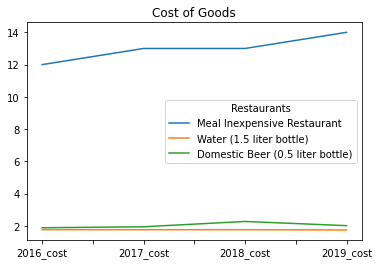

In [45]:
#I don't like this graph
cheap.plot.line(title="Cost of Goods");

plt.show;

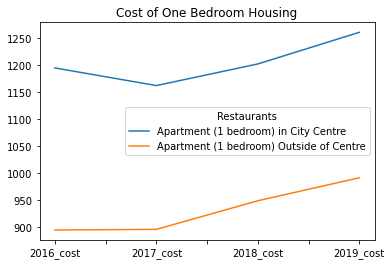

In [46]:
apart.plot.line(title="Cost of One Bedroom Housing");

plt.show;

## I have completed basic breakdown of goods over time. Let's look at the crime statistics. 

In [47]:
violent6=cr16[['Area','Year','Population2','Violent crime3']]
violent7=cr17[['Area','Year','Population2','Violent crime3']]
violent8=cr18[['Area','Year','Population2','Violent crime3']]
violent9=cr19[['Area','Year','Population2','Violent crime3']]
violent5=cr15[['Area','Year','Population2','Violent crime3']]

In [48]:
# looking for where a 0 was added in 2015
#violent5
#it seems to sync with previous data from csv correctly

In [49]:
violent=pd.concat([violent5,violent6,violent7,violent8,violent9])

In [50]:
violent

2,Area,Year,Population2,Violent crime3
0,NaN,NaN,NaN,
1,"United States Total6, 7, 8, 9",2014,"318,907,401","1,186,185"
2,NaN,2015,"321,418,820","1,231,566"
3,NaN,Percent\nchange,NaN,+3.8
4,Northeast6,2014,"56,171,281","182,139"
5,NaN,2015,"56,283,891","180,472"
6,NaN,Percent\nchange,NaN,-0.9
7,New England6,2014,"14,689,812","42,550"
8,NaN,2015,"14,727,584","42,089"
9,NaN,Percent\nchange,,-1.1


In [51]:
violent['Area']=violent['Area'].fillna(method='ffill')
violent

2,Area,Year,Population2,Violent crime3
0,NaN,NaN,NaN,
1,"United States Total6, 7, 8, 9",2014,"318,907,401","1,186,185"
2,"United States Total6, 7, 8, 9",2015,"321,418,820","1,231,566"
3,"United States Total6, 7, 8, 9",Percent\nchange,NaN,+3.8
4,Northeast6,2014,"56,171,281","182,139"
5,Northeast6,2015,"56,283,891","180,472"
6,Northeast6,Percent\nchange,NaN,-0.9
7,New England6,2014,"14,689,812","42,550"
8,New England6,2015,"14,727,584","42,089"
9,New England6,Percent\nchange,,-1.1


In [52]:
#Drop the percent change rows because they seem to be creating pivot problems
violent = violent.drop(violent[violent['Year'] == 'Percent change'].index, inplace=False)
violent

2,Area,Year,Population2,Violent crime3
0,NaN,NaN,NaN,
1,"United States Total6, 7, 8, 9",2014,"318,907,401","1,186,185"
2,"United States Total6, 7, 8, 9",2015,"321,418,820","1,231,566"
4,Northeast6,2014,"56,171,281","182,139"
5,Northeast6,2015,"56,283,891","180,472"
7,New England6,2014,"14,689,812","42,550"
8,New England6,2015,"14,727,584","42,089"
10,Connecticut,2014,"3,594,762","8,575"
11,Connecticut,2015,"3,590,886","7,845"
13,Maine6,2014,"1,330,256","1,698"


In [53]:
violent=violent.drop_duplicates(subset=['Area', 'Year'],keep='last',ignore_index=False)
v_table=violent.groupby(['Area','Year'],as_index=True).first()
v_table.reset_index(inplace=True)
v_table

2,Area,Year,Population2,Violent crime3
0,Alabama,2016,4860545,25878
1,Alabama,2017,4874747,25551
2,Alabama,2014,"4,846,411","20,727"
3,Alabama,2015,"4,853,875","22,957"
4,Alabama,2016,"4,863,300","25,886"
5,Alabama,2017,"4,875,120","25,469"
6,Alabama,2018,"4,887,681","25,567"
7,Alabama,2019,"4,903,185","25,046"
8,Alaska,2016,741522,5966
9,Alaska,2017,739795,6133


In [54]:
violent.Year.value_counts()

2015    79
2014    66
2016    66
2016    66
2017    66
2017    66
2018    66
2019    66
Name: Year, dtype: int64

In [55]:
#lets see what we are working with
violent.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 545 entries, 0 to 197
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Area            544 non-null    object
 1   Year            541 non-null    object
 2   Population2     541 non-null    object
 3   Violent crime3  545 non-null    object
dtypes: object(4)
memory usage: 21.3+ KB


In [56]:
violent.Year.value_counts()

2015    79
2014    66
2016    66
2016    66
2017    66
2017    66
2018    66
2019    66
Name: Year, dtype: int64

In [57]:
#I was having trouble with the NaN values in Population, so I decided to convert it into a string first to isolate the letters.
violent['Population2']=violent['Population2'].astype('str')
violent.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 545 entries, 0 to 197
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Area            544 non-null    object
 1   Year            541 non-null    object
 2   Population2     545 non-null    object
 3   Violent crime3  545 non-null    object
dtypes: object(4)
memory usage: 21.3+ KB


In [58]:
#I think I need to change the types of population and crime to int or floats to show up in the pivot table. 
violent['Population2'] = violent['Population2'].str.replace('nan',"0")
violent['Population2'] = violent['Population2'].str.replace(',',"")
#eventually came up with this regex to help if =! \d then make it a \d

#violent['Population2'] = violent['Population2'].str.replace('',"")
#Removing the commas to make it a float was easy. Removing the NaN was 难
violent['Violent crime3'] = violent['Violent crime3'].str.replace('NaN',"0")
violent['Violent crime3'] = violent['Violent crime3'].str.replace(',',"")
#This was the culprit of adding extra numbers
#violent['Violent crime3'] = violent['Violent crime3'].str.replace(r'\s',"0")
violent['Year'] = violent['Year'].str.replace('Percent\nchange',"")
violent

2,Area,Year,Population2,Violent crime3
0,NaN,NaN,0,
1,"United States Total6, 7, 8, 9",2014,318907401,1186185
4,Northeast6,2014,56171281,182139
7,New England6,2014,14689812,42550
10,Connecticut,2014,3594762,8575
13,Maine6,2014,1330256,1698
14,Maine6,2015,1329328,1729
16,Massachusetts,2014,6755124,26689
19,New Hampshire,2014,1327996,2625
22,Rhode Island6,2014,1054907,2320


In [59]:
#violent['Violent crime3'].astype('float')
#I got the Populations to work, but now this one has a * somewhere. Let's see where that is and what it represents
violent['Violent crime3'].str.find(r'*')

0     -1.0
1     -1.0
4     -1.0
7     -1.0
10    -1.0
13    -1.0
14    -1.0
16    -1.0
19    -1.0
22    -1.0
25    -1.0
28    -1.0
31    -1.0
34    -1.0
37    -1.0
40    -1.0
43    -1.0
46    -1.0
49    -1.0
52    -1.0
55    -1.0
58    -1.0
61    -1.0
64    -1.0
67    -1.0
70    -1.0
73    -1.0
76    -1.0
79    -1.0
82    -1.0
83    -1.0
85    -1.0
86    -1.0
88    -1.0
89    -1.0
91    -1.0
94    -1.0
97    -1.0
100   -1.0
101   -1.0
103   -1.0
106   -1.0
107   -1.0
109   -1.0
112   -1.0
115   -1.0
118   -1.0
121   -1.0
124   -1.0
127   -1.0
130   -1.0
133   -1.0
134   -1.0
136   -1.0
139   -1.0
142   -1.0
143   -1.0
145   -1.0
148   -1.0
149   -1.0
151   -1.0
152   -1.0
154   -1.0
157   -1.0
160   -1.0
163   -1.0
166   -1.0
169   -1.0
170   -1.0
172   -1.0
173   -1.0
175   -1.0
178   -1.0
181   -1.0
184   -1.0
187   -1.0
190   -1.0
193   -1.0
196   -1.0
197   -1.0
0     -1.0
1     -1.0
2     -1.0
4     -1.0
5     -1.0
7     -1.0
8     -1.0
10    -1.0
11    -1.0
13    -1.0
14    -1.0

In [60]:
table = pd.pivot_table(violent, index=['Year'])
table

2
Year
2014
2015
2016
2017
2018
2019


In [61]:
table.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, 2014 to 2019
Empty DataFrame

In [62]:
#Alaska and Hawaii are outliers because they import so much and that would throw off costs. 

# I just realized some of the names were off for states. Let's fix that

In [63]:
violent['Area'].value_counts()

     Maryland                    8
     North Dakota                8
     Arizona                     8
     Texas                       8
     Kansas                      8
     Minnesota                   8
     Missouri                    8
     Louisiana                   8
     Arkansas                    8
     Michigan                    8
     Tennessee                   8
     Delaware                    8
     Kentucky                    8
     Florida                     8
     Alabama                     8
     West Virginia               8
     South Carolina              8
     Colorado                    8
     Idaho                       8
     Alaska                      8
     Connecticut                 8
     Hawaii                      8
     Massachusetts               8
     New Hampshire               8
     California                  8
     Illinois                    8
     Vermont                     8
     New Jersey                  8
     Wyoming        

#### States with multiple identifiers
    Maine                       
    Utah                    
    South Dakota  
    Oklahoma  
    New York             
    Oregon 
    Washington             
    Indiana                  
    Rhode Island 
    Puerto Rico   
    Iowa                        
    Georgia                     
    Mississippi               
    Nebraska 
    New England 
    Wisconsin    
    New Mexico 

### Let's try and fix them with regexes

In [64]:
violent['Area'] = violent['Area'].str.replace(r'\d+',"")
violent['Area'] = violent['Area'].str.replace(r',+',"")
# violent['Area'] = violent['Area'].str.replace(r'Maine\b',"Maine")
# violent['Area'] = violent['Area'].str.replace(r'Utah\b',"Utah")
# violent['Area'] = violent['Area'].str.replace(r'South\w*D\b',"South Dakota")
# violent['Area'] = violent['Area'].str.replace(r'New\w*Y\b',"New York")
# violent['Area'] = violent['Area'].str.replace(r'Ore\b',"Oregon")
# violent['Area'] = violent['Area'].str.replace(r'Wash\b',"Washington")
# violent['Area'] = violent['Area'].str.replace(r'Indi\b',"Indiana")
# violent['Area'] = violent['Area'].str.replace(r'Rhode\w*\b',"Rhode Island")
# violent['Area'] = violent['Area'].str.replace(r'Puer\w',"Puerto Rico")
# violent['Area'] = violent['Area'].str.replace(r'Iowa\b',"Iowa")
# violent['Area'] = violent['Area'].str.replace(r'Geor\w',"Georgia")
# violent['Area'] = violent['Area'].str.replace(r'Mississ\b',"Mississippi")
# violent['Area'] = violent['Area'].str.replace(r'Neb\w',"Nebraska")
# violent['Area'] = violent['Area'].str.replace(r'New\s*En\b',"New England")
# violent['Area'] = violent['Area'].str.replace(r'Wis\b',"Wisconsin")
# violent['Area'] = violent['Area'].str.replace(r'New\s*Me\b',"New Mexico")

In [65]:
#did it work?
violent.Area.value_counts()


Puerto Rico                  9
     Utah                    9
     South Dakota            9
West South Central           9
     Oklahoma                9
West                         9
     New Mexico              9
     North Carolina          9
     Maine                   9
Pacific                      8
     Arkansas                8
     South Carolina          8
Northeast                    8
     West Virginia           8
East South Central           8
     Washington              8
     Alabama                 8
     Kentucky                8
     Mississippi             8
     Tennessee               8
     Oregon                  8
     Louisiana               8
     Wyoming                 8
     Texas                   8
     Hawaii                  8
     Maryland                8
     Colorado                8
     Idaho                   8
     Montana                 8
     Nevada                  8
     California              8
     Alaska                  8
     Ari

In [66]:
violent['Area'] = violent['Area'].str.replace(r'\wGeorgia\w*',"Georgia")
violent.Area.value_counts().tail()

Mountain                2
     Georgia            2
United States Total     2
South                   2
South                   2
Name: Area, dtype: int64

In [67]:
#troubleshooting. my pivot table is dropping 2016. is there a 2016 record for Alabama in original frame?
violent

2,Area,Year,Population2,Violent crime3
0,NaN,NaN,0,
1,United States Total,2014,318907401,1186185
4,Northeast,2014,56171281,182139
7,New England,2014,14689812,42550
10,Connecticut,2014,3594762,8575
13,Maine,2014,1330256,1698
14,Maine,2015,1329328,1729
16,Massachusetts,2014,6755124,26689
19,New Hampshire,2014,1327996,2625
22,Rhode Island,2014,1054907,2320


In [68]:
v_table['Year'].value_counts()

2015    79
2016    66
2017    66
2014    66
2016    66
2017    66
2018    66
2019    66
Name: Year, dtype: int64

In [69]:
# Remake this table again
table =violent.groupby(['Area', 'Year']).first()
table.head(30)

2                    Population2 Violent crime3
Area            Year                           
     Alabama    2014     4846411         20727 
                2015     4853875          22957
                2016     4863300          25886
                2017     4875120          25469
                2018     4887681          25567
                2019     4903185          25046
     Alaska     2014      737046          4684 
                2015      737709           5391
                2016      741894           5966
                2017      739786           6338
                2018      735139           6555
                2019      731545           6343
     Arizona    2014     6728783         26422 
                2015     6817565          27968
                2016     6931071          32583
                2017     7048876          35647
                2018     7158024          34053
                2019     7278717          33141
     Arkansas   2014     2966835         14248 
                2015     2977853          15769
                2016     2988248          16461
                2017     3002997          16996
                2018     3009733          16904
                2019     3017804          17643
     California 2014    38792291        153763 
                2015    38993940         166883
                2016    39250017         174796
                2017    39399349         178597
                2018    39461588         176604
                2019    39512223         174331

In [70]:
#found a better way to do it than having a pivot table.
table.reset_index(inplace=True)
table.head(8)

2,Area,Year,Population2,Violent crime3
0,Alabama,2014,4846411,20727
1,Alabama,2015,4853875,22957
2,Alabama,2016,4863300,25886
3,Alabama,2017,4875120,25469
4,Alabama,2018,4887681,25567
5,Alabama,2019,4903185,25046
6,Alaska,2014,737046,4684
7,Alaska,2015,737709,5391


In [71]:
#export to xlsx for Tableau use
v_table.to_excel(r'violent_data.xlsx',sheet_name='violent_sorted',index=False)

In [72]:
# Do the same with Murder and burglary. 

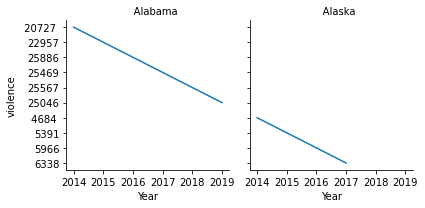

In [73]:
g = sns.FacetGrid(table.head(10), col='Area')
g.map_dataframe(sns.lineplot, x='Year', y='Violent crime3')
g.set_axis_labels('Year', 'violence')
g.set_titles(col_template='{col_name}')

#### Having trouble getting it mapped out past .head(50). I need to come back to this, but have to chart the economic data by city to overlay

In [74]:
tabel15=tabel15.drop(columns={'Consumer Price Index','Consumer Price Plus Rent Index','Local Purchasing Power Index'})
tabel16=tabel16.drop(columns={'Cost of Living Index','Cost of Living Plus Rent Index','Local Purchasing Power Index','Rank'})
tabel17=tabel17.drop(columns={'Cost of Living Index','Cost of Living Plus Rent Index','Local Purchasing Power Index','Rank'})
tabel18=tabel18.drop(columns={'Cost of Living Index','Cost of Living Plus Rent Index','Local Purchasing Power Index','Rank'})
tabel19=tabel19.drop(columns={'Cost of Living Index','Cost of Living Plus Rent Index','Local Purchasing Power Index','Rank'})

In [75]:
#I started with a left join to tabel 17 because it has the most city data. I know this from running all tabels through a .info()
city_living=tabel17.merge(tabel16, how='left', on='City')
city_living=city_living.rename(columns= {'Rent Index_x':'Rent_17', 'Groceries Index_x': 'Groceries_17','Restaurant Price Index_x':'Eat-out_17'})
city_living=city_living.rename(columns= {'Rent Index_y':'Rent_16', 'Groceries Index_y': 'Groceries_16','Restaurant Price Index_y':'Eat-out_16'})

In [76]:
city_living.head()

,City,Rent_17,Groceries_17,Eat-out_17,Rent_16,Groceries_16,Eat-out_16
0,"New York, NY",100.00,100.00,100.00,100.00,100.00,100.00
1,"Honolulu, HI",65.16,110.83,87.65,65.44,110.54,83.76
2,"San Francisco, CA",120.04,110.61,94.26,123.80,110.55,90.70
3,"Rockville, MD",60.80,93.68,80.12,NaN,NaN,NaN
4,"Anchorage, AK",42.89,101.70,86.79,NaN,NaN,NaN


In [77]:
city_living=city_living.merge(tabel15, how="left", on='City')
city_living=city_living.rename(columns={'Rent Index':'Rent_15', 'Groceries Index':'Groceries_15', 'Restaurant Price Index':'Eat-out_15'})

In [78]:
city_living=city_living.merge(tabel18, how="left", on='City')
city_living.head()
city_living=city_living.rename(columns={'Rent Index':'Rent_18', 'Groceries Index':'Groceries_18', 'Restaurant Price Index':'Eat-out_18'})

In [79]:
city_living=city_living.merge(tabel19, how="left", on='City')
city_living=city_living.rename(columns={'Rent Index':'Rent_19', 'Groceries Index':'Groceries_19', 'Restaurant Price Index':'Eat-out_19'})

In [80]:
#Get rid of rows that have more than one missing value in the 5 year span or repeat states
city_redux=city_living.drop([3,5,6,7,9,12,13,15,16,17,18,22,25,26,28,29,34,35,39,42,43,44,45,47,48,52,55,56,59,62,63,66])
city_redux=city_living.drop([71,72,74,75,76,79,80,81,86,88,90,92,93,96,98,100,102,108,116,118,119])
#city_redux

In [81]:
#Specify the state by separating it and renaming them
city_redux[['City','State']]=city_redux.City.str.split(',',expand=True)

In [82]:
city_redux.State.value_counts()

 CA    11
 FL     9
 WA     6
 NC     5
 NY     4
 TX     4
 PA     4
 OH     4
 MO     3
 CO     3
 MI     3
 VA     2
 NJ     2
 AZ     2
 OK     2
 MD     2
 TN     2
 WI     2
 AR     2
 GA     2
 LA     2
 CT     2
 SC     2
 MN     2
 HI     1
 KY     1
 NM     1
 UT     1
 NV     1
 KS     1
 NH     1
 IL     1
 DC     1
 OR     1
 IN     1
 IA     1
 VT     1
 ME     1
 MA     1
 AK     1
 ID     1
Name: State, dtype: int64

In [83]:
#city_redux.loc[city_redux['State'].str.contains('CA')]
#Drop all but one as representative. Oakland closeset to the avg.
#city_redux.loc[city_redux['State'].str.contains('FL')]
#drop all but Tampa, the closest rent avg. 
#city_redux.loc[city_redux['State'].str.contains('WA')]
# Everett closest to avg
#city_redux.loc[city_redux['State'].str.contains('NC')]
#Raleigh best for NC
#city_redux.loc[city_redux['State'].str.contains('NY')]
#NY city has the most data
#city_redux.loc[city_redux['State'].str.contains('TX')]
#Houston best avg.
#city_redux.loc[city_redux['State'].str.contains('PA')]
#Pittsburgh best avg, philadelphia much higher than others.
#city_redux.loc[city_redux['State'].str.contains('OH')]
#Cincinnati best with consistent data
#city_redux.loc[city_redux['State'].str.contains('MO')]
#Kansas City is too close to the border and affected by other state trade. Let's use St. Louis
#city_redux.loc[city_redux['State'].str.contains('CO')]
#Denver has the most data
#city_redux.loc[city_redux['State'].str.contains('MI')]
# Ann Arbor has the most data recorded


In [84]:
city_redux=city_redux.drop([2,9,15,25,35,37,39,44,50,66,14,17,29,42,
                            48,52,55,104,8,13,43,62,85,30,34,67,68,7,18,33,63,65,113,19,31,58,
                            41,89,95,103,117,26,28,49,59,10,94,115,87,3,112,105,53,78,110,6,16,45])


#### The rest were chosen by those that presented the most complete set of data

In [85]:
# I want to order the columns by year
city_rent=city_redux[['State','City','Rent_15','Rent_16','Rent_17','Rent_18','Rent_19']]
city_goods=city_redux[['State','City','Groceries_15','Groceries_16','Groceries_17','Groceries_18','Groceries_19']]
city_meals=city_redux[['State','City','Eat-out_15','Eat-out_16','Eat-out_17','Eat-out_18','Eat-out_19']]


In [86]:
#export to tableau
city_rent.to_excel(r'city_rent.xlsx',sheet_name='rent_sorted',index=False)
city_goods.to_excel(r'city_goods.xlsx',sheet_name='goods_sorted',index=False)
city_meals.to_excel(r'city_meal.xlsx',sheet_name='meal_sorted',index=False)

## Let's sort the rest of the crime data, export it to Tableau and close this baby. 

In [87]:
cr16.head(1)

2,Area,Year,Population2,Violent crime3,NaN,Murder and \nnonnegligent \nmanslaughter,NaN,Rape\n(revised definition)4,NaN,Rape\n(legacy definition)5,...,Aggravated assault,NaN,Property crime,NaN,Burglary,NaN,Larceny-theft,NaN,Motor vehicle theft,NaN
0,NaN,NaN,NaN,,"Rate per \n100,000",,"Rate per \n100,000",,"Rate per \n100,000",,...,,"Rate per \n100,000",,"Rate per \n100,000",,"Rate per \n100,000",,"Rate per \n100,000",,"Rate per \n100,000"


In [88]:
l6=cr16[['Area','Year','Population2','Murder and \nnonnegligent \nmanslaughter','Burglary', 'Larceny-theft']]
l7=cr17[['Area','Year','Population2','Murder and \nnonnegligent \nmanslaughter','Burglary', 'Larceny-theft']]
l8=cr18[['Area','Year','Population2','Murder and \nnonnegligent \nmanslaughter','Burglary', 'Larceny-theft']]
l9=cr19[['Area','Year','Population2','Murder and \nnonnegligent \nmanslaughter','Burglary', 'Larceny-theft']]
l5=cr15[['Area','Year','Population2','Murder and \nnonnegligent \nmanslaughter','Burglary', 'Larceny-theft']]

In [89]:
df=pd.concat([l5, l6, l7, l8, l9])

In [90]:
df['Area']=df['Area'].fillna(method='ffill')
df

2,Area,Year,Population2,Murder and \nnonnegligent \nmanslaughter,Burglary,Larceny-theft
0,NaN,NaN,NaN,,,
1,"United States Total6, 7, 8, 9",2014,"318,907,401","14,164","1,713,153","5,809,054"
2,"United States Total6, 7, 8, 9",2015,"321,418,820","15,696","1,579,527","5,706,346"
3,"United States Total6, 7, 8, 9",Percent\nchange,NaN,+10.8,-7.8,-1.8
4,Northeast6,2014,"56,171,281","1,873","181,279","781,124"
5,Northeast6,2015,"56,283,891","1,951","157,909","736,844"
6,Northeast6,Percent\nchange,NaN,+4.2,-12.9,-5.7
7,New England6,2014,"14,689,812",295,"53,116","208,755"
8,New England6,2015,"14,727,584",321,"46,009","192,654"
9,New England6,Percent\nchange,,+8.8,-13.4,-7.7


In [95]:
df = df.drop(violent[violent['Year'] == 'Percent change'].index, inplace=False)
df['Year'] =df['Year'].str.replace('Percent\nchange','bugger')
df = df.rename(columns = {'Murder and \nnonnegligent \nmanslaughter': "Murder"})
df

2,Area,Year,Population2,Murder,Burglary,Larceny-theft
0,Alabama,NaN,4860545,407,34045,97498
1,Alabama,NaN,4874747,404,31477,99842
2,Alabama,2014,"4,846,411",276,"39,723","104,223"
3,Alabama,2015,"4,853,875",348,"35,265","99,182"
4,Alabama,2016,"4,863,300",407,"34,065","97,574"
5,Alabama,2017,"4,875,120",419,"31,270","99,707"
6,Alabama,2018,"4,887,681",383,"29,101","96,328"
7,Alabama,2019,"4,903,185",358,"26,079","92,477"
8,Alabama,bugger,None,+26.1,-11.2,-4.9
9,Alabama,Percent change,None,-6.5,-10.4,-4


In [112]:
df.drop(df[df['Year'] == 'bugger'].index, inplace=True)
df.drop(df[df['Year'] == 'Percent change'].index, inplace=True)

In [113]:
df=df.drop_duplicates(subset=['Area', 'Year'],keep='last',ignore_index=False)
df=df.groupby(['Area','Year'],as_index=True).first()
df.reset_index(inplace=True)


In [115]:
table1 =df.drop_duplicates(subset=['Area', 'Year'],keep='last')
table1.head(10)

2,Area,Year,Population2,Murder,Burglary,Larceny-theft
0,Alabama,2014,"4,846,411",276,"39,723","104,223"
1,Alabama,2015,"4,853,875",348,"35,265","99,182"
2,Alabama,2016,"4,863,300",407,"34,065","97,574"
3,Alabama,2017,"4,875,120",419,"31,270","99,707"
4,Alabama,2018,"4,887,681",383,"29,101","96,328"
5,Alabama,2019,"4,903,185",358,"26,079","92,477"
6,Alaska,2014,"737,046",41,"3,150","15,445"
7,Alaska,2015,"737,709",59,"3,511","15,249"
8,Alaska,2016,"741,894",52,"4,053","17,766"
9,Alaska,2017,"739,786",62,"4,167","17,782"


In [119]:
thief=table1.drop(columns={"Murder"})
thief.head()

2,Area,Year,Population2,Burglary,Larceny-theft
0,Alabama,2014,"4,846,411","39,723","104,223"
1,Alabama,2015,"4,853,875","35,265","99,182"
2,Alabama,2016,"4,863,300","34,065","97,574"
3,Alabama,2017,"4,875,120","31,270","99,707"
4,Alabama,2018,"4,887,681","29,101","96,328"


In [120]:
murder=table1.drop(columns={'Burglary', 'Larceny-theft'})
murder

2,Area,Year,Population2,Murder
0,Alabama,2014,"4,846,411",276
1,Alabama,2015,"4,853,875",348
2,Alabama,2016,"4,863,300",407
3,Alabama,2017,"4,875,120",419
4,Alabama,2018,"4,887,681",383
5,Alabama,2019,"4,903,185",358
6,Alaska,2014,"737,046",41
7,Alaska,2015,"737,709",59
8,Alaska,2016,"741,894",52
9,Alaska,2017,"739,786",62


In [121]:
#export for final workable tableau tables.
murder.to_excel(r'murder.xlsx',sheet_name='murder_sorted',index=False)
thief.to_excel(r'thief.xlsx',sheet_name='thief_sorted',index=False)